# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['arraial do cabo',
 'huarmey',
 'albany',
 'glendive',
 'sechura',
 'grand river south east',
 'taolanaro',
 'krasnoselkup',
 'ushuaia',
 'mataura',
 'suntar',
 'ulaanbaatar',
 'busselton',
 'hasaki',
 'maryville',
 'kuala terengganu',
 'avarua',
 'barentsburg',
 'cape town',
 'temaraia',
 'ponta delgada',
 'tual',
 'chokurdakh',
 'skjervoy',
 'atuona',
 'arinos',
 'aberdeen',
 'klaksvik',
 'puerto ayora',
 'narsaq',
 'bathsheba',
 'port elizabeth',
 'lavrentiya',
 'cabedelo',
 'cherskiy',
 'rikitea',
 'coleraine',
 'kapaa',
 'bontang',
 'bijapur',
 'vaini',
 'ruatoria',
 'goundam',
 'carnarvon',
 'lagoa',
 'port lincoln',
 'touros',
 'khasan',
 'amderma',
 'kavieng',
 'elk point',
 'jalapa',
 'yenagoa',
 'sentyabrskiy',
 'namatanai',
 'belaya gora',
 'havoysund',
 'burnie',
 'porto novo',
 'bluff',
 'palafrugell',
 'bredasdorp',
 'basco',
 'nizhneyansk',
 'hithadhoo',
 'east london',
 'clyde river',
 'yellowknife',
 'berdigestyakh',
 'pisco',
 'santa maria',
 'izumo',
 'cabo rojo',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

number = -1
skip = 0
city_name=[]
temp =[]
cloud=[]
country=[]
date=[]
hum=[]
latit=[]
long=[]
wind=[]
num =[]
print("Beginning of data collection")
print("--------------------------------")
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        latit.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        number+=1
        num.append(number)
        print("Processing record  " +str(number+1)+ " and " + str(skip) + " skipped" + "|" + response['name'])
    except KeyError:
        skip+=1
        print(f"City was not found. Skiping... ")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
weather_dic = {"City ID": num,"City": city_name, "Cloudiness":cloud, "Country":country, "Date": date, 
               "Humidity": hum, "Lat":latit, "Lng":long, "Max Temp": temp,"Wind Speed": wind}

Beginning of data collection
--------------------------------
Processing record  1 and 0 skipped|Arraial do Cabo
Processing record  2 and 0 skipped|Huarmey
Processing record  3 and 0 skipped|Albany
Processing record  4 and 0 skipped|Glendive
Processing record  5 and 0 skipped|Sechura
City was not found. Skiping... 
City was not found. Skiping... 
Processing record  6 and 2 skipped|Krasnosel'kup
Processing record  7 and 2 skipped|Ushuaia
Processing record  8 and 2 skipped|Mataura
Processing record  9 and 2 skipped|Suntar
Processing record  10 and 2 skipped|Ulaanbaatar
Processing record  11 and 2 skipped|Busselton
Processing record  12 and 2 skipped|Hasaki
Processing record  13 and 2 skipped|Maryville
Processing record  14 and 2 skipped|Kuala Terengganu
Processing record  15 and 2 skipped|Avarua
City was not found. Skiping... 
Processing record  16 and 3 skipped|Cape Town
City was not found. Skiping... 
Processing record  17 and 4 skipped|Ponta Delgada
Processing record  18 and 4 skipped

Processing record  165 and 17 skipped|Porto Santo
Processing record  166 and 17 skipped|Buraidah
Processing record  167 and 17 skipped|Vila
Processing record  168 and 17 skipped|Puerto Carreño
City was not found. Skiping... 
Processing record  169 and 18 skipped|Tiksi
Processing record  170 and 18 skipped|Safi
Processing record  171 and 18 skipped|Chapais
Processing record  172 and 18 skipped|Belmonte
Processing record  173 and 18 skipped|Hanzhong
Processing record  174 and 18 skipped|Koudougou
Processing record  175 and 18 skipped|Pital
City was not found. Skiping... 
Processing record  176 and 19 skipped|Tignère
Processing record  177 and 19 skipped|Tautira
Processing record  178 and 19 skipped|Mandera
Processing record  179 and 19 skipped|Aykhal
Processing record  180 and 19 skipped|New Norfolk
Processing record  181 and 19 skipped|Muros
Processing record  182 and 19 skipped|Bonthe
Processing record  183 and 19 skipped|Kieta
Processing record  184 and 19 skipped|Mīāndoāb
Processing 

Processing record  330 and 30 skipped|Sorong
Processing record  331 and 30 skipped|Milledgeville
Processing record  332 and 30 skipped|Ajdabiya
Processing record  333 and 30 skipped|Pevek
Processing record  334 and 30 skipped|Tres Arroyos
Processing record  335 and 30 skipped|Salalah
Processing record  336 and 30 skipped|Yabrūd
Processing record  337 and 30 skipped|Berlevåg
Processing record  338 and 30 skipped|Baft
Processing record  339 and 30 skipped|Bayanday
Processing record  340 and 30 skipped|Leoben
Processing record  341 and 30 skipped|Hofn
Processing record  342 and 30 skipped|Saldanha
Processing record  343 and 30 skipped|Panguna
City was not found. Skiping... 
Processing record  344 and 31 skipped|Caborca
Processing record  345 and 31 skipped|Gigmoto
Processing record  346 and 31 skipped|Benghazi
Processing record  347 and 31 skipped|Ariquemes
Processing record  348 and 31 skipped|Thunder Bay
Processing record  349 and 31 skipped|Ouallam
Processing record  350 and 31 skipped

Processing record  495 and 45 skipped|São Miguel do Araguaia
Processing record  496 and 45 skipped|Arona
Processing record  497 and 45 skipped|Linjiang
Processing record  498 and 45 skipped|Yārāda
Processing record  499 and 45 skipped|Santa Cruz de La Palma
Processing record  500 and 45 skipped|Krasnoslobodsk
Processing record  501 and 45 skipped|Palmer
Processing record  502 and 45 skipped|Sesheke
Processing record  503 and 45 skipped|Moose Factory
Processing record  504 and 45 skipped|Thinadhoo
Processing record  505 and 45 skipped|Pavlogradka
Processing record  506 and 45 skipped|Spassk
Processing record  507 and 45 skipped|Rapid Valley
Processing record  508 and 45 skipped|Santa Cruz de la Sierra
Processing record  509 and 45 skipped|Northbridge
Processing record  510 and 45 skipped|Roald
Processing record  511 and 45 skipped|Pozo Colorado
Processing record  512 and 45 skipped|Walvis Bay
Processing record  513 and 45 skipped|Bryan
Processing record  514 and 45 skipped|Codrington
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Building DataFrame and saving the same to csv file
weather_data = pd.DataFrame(weather_dic)
weather_data.to_csv(r'../output_data/cities.csv',index=False, header=True)

In [17]:
# Calling csv file to avoid excessive API calls
csv = '../output_data/cities.csv'
weather_data = pd.read_csv(csv)
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Arraial do Cabo,84,BR,1599895285,90,-22.97,-42.03,22.01,11.17
1,1,Huarmey,75,PE,1599895410,85,-10.07,-78.15,15.44,1.57
2,2,Albany,0,US,1599895082,81,42.60,-73.97,10.00,1.22
3,3,Glendive,1,US,1599895357,87,47.11,-104.71,9.00,2.60
4,4,Sechura,13,PE,1599895730,82,-5.56,-80.82,16.57,3.53


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Skipping this step since there are no cities with humidity > 100% in the DataFrame

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

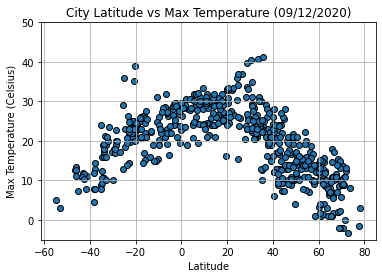

In [18]:
# Scatter plot for Latitude vs Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Create today's timestamp
today_date = pd.Timestamp("today").strftime("%m/%d/%Y")

# Graph properties
plt.title(f"City Latitude vs Max Temperature ({today_date})")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.ylim(-5, 50)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

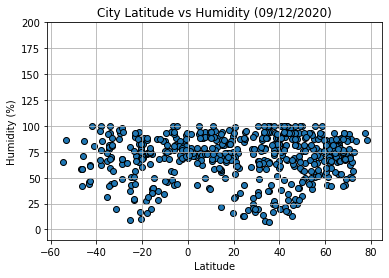

In [19]:
# Scatter plot for Latitude vs Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

# Graph properties
plt.title(f"City Latitude vs Humidity ({today_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 200)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

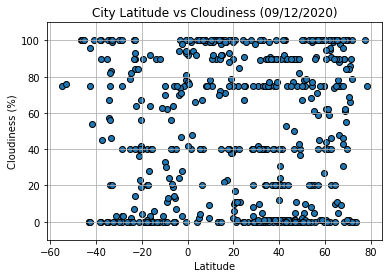

In [20]:
# Scatter plot for Latitude vs Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({today_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 110)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

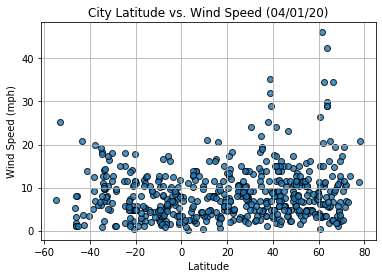

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


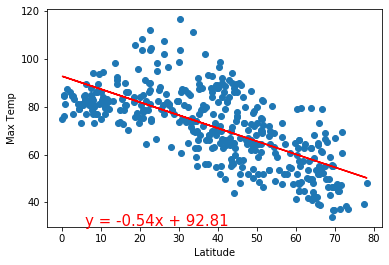

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


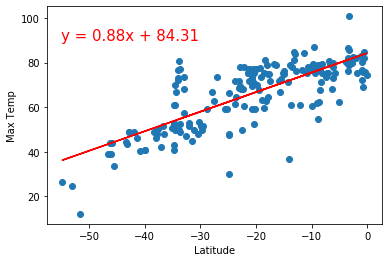

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


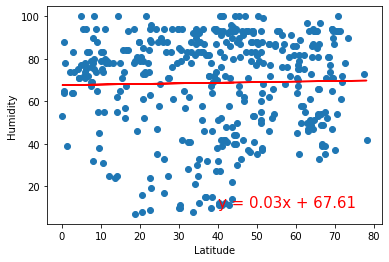

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


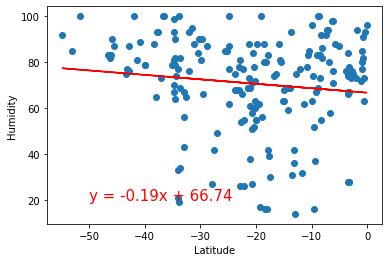

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


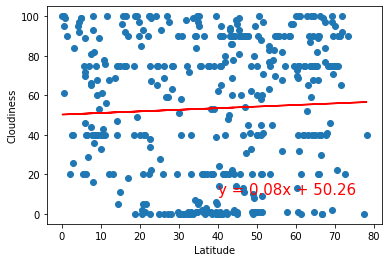

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


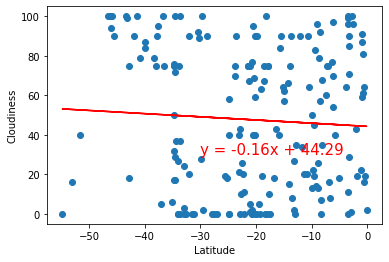

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


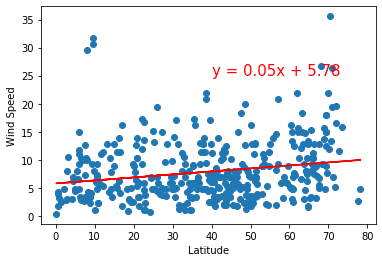

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


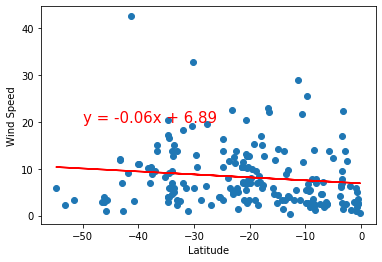